In [1]:
!pip install -q transformers
!pip install Pillow
!pip install torch torchvision torchaudio


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import torch
from PIL import Image
from transformers import TrOCRProcessor
from transformers import VisionEncoderDecoderModel

## Load image

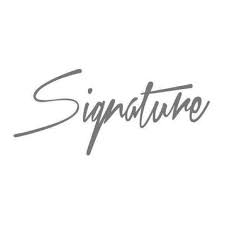

In [16]:
IMAGE_PATH = "./sample_sign1.jpg"
image = Image.open(IMAGE_PATH).convert("RGB")
image

## Prepare image for model

In [17]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
# calling the processor is equivalent to calling the feature extractor
pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


torch.Size([1, 3, 384, 384])


## Load model

In [18]:
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Generate text

In [19]:
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

Signature.
